In [ ]:
import pandas as pd
import numpy as np

d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d, dtype=np.int8)
df

,col1,col2
0,1,3
1,2,4


In [ ]:
df.dtypes

col1    int8
col2    int8
dtype: object

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])

df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000}]

df3 = pd.DataFrame(mydict)
df3

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [ ]:
!pwd

/content


In [ ]:
!ls -l /python-apt/

ls: cannot access '/python-apt/': No such file or directory


In [ ]:
!mkdir test

In [ ]:
!echo 'This is a test' > data.txt

In [ ]:
!echo 'yet another line' >> data.txt

In [ ]:
!touch test.txt

In [ ]:
!ls -l data.txt test.txt

-rw-r--r-- 1 root root 32 Feb 24 02:23 data.txt
-rw-r--r-- 1 root root  0 Feb 24 02:23 test.txt


Clase 9 de febrero

In [ ]:
data = [1, 3, 2]
#retorna el dato mayor
result = max(data)
print(result)

3


In [ ]:
from numpy import argmax
#argmax da la posición del mayor
data = [3, 1, 2]
result = argmax(data)
print(result)

0


In [ ]:
from math import exp
#softmax

p1 = exp(1) / (exp(1) + exp(3) + exp(2))
p2 = exp(3) / (exp(1) + exp(3) + exp(2))
p3 = exp(2) / (exp(1) + exp(3) + exp(2))
#probabilidades
print(p1, p2, p3)
# suma de probabilidades
print(p1 + p2 + p3)

0.09003057317038046 0.6652409557748219 0.24472847105479767
1.0


In [ ]:
#Softmax implementado con numpy
from numpy import exp

def softmax(vector):
  e = exp(vector)
  return e / e.sum()

#datos
data = [1, 3, 2]

result = softmax(data)
print(result)
print(sum(result))

[0.09003057 0.66524096 0.24472847]
1.0


In [ ]:
#Softmax de scipy
from scipy.special import softmax

data = [1, 3, 2]
result = softmax(data)
print(result)
print(sum(result))

[0.09003057 0.66524096 0.24472847]
0.9999999999999999


## Clase 23 de febrero

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load all the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# Split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# Ensure all data are floating point values
X = X.astype('float32')

# Encode string to integer
y = LabelEncoder().fit_transform(y)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the nomber of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accurancy: {acc:.3f}")

# prediction
row = [5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print(f"Predicted: {yhat} (class = {argmax(yhat)})")

(100, 4) (50, 4) (100,) (50,)
Test accurancy: 0.920
1/1 [==============================] - 0s 73ms/step
Predicted: [[9.7223073e-01 2.7116880e-02 6.5235572e-04]] (class = 0)


### Funciones de activación

### Sigmoide

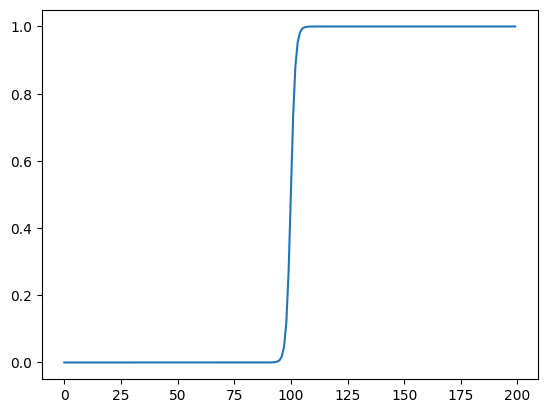

In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

ip = [x for x in range(-100, 100)]
op = [sigmoid(x) for x in ip]
plt.plot(op)
plt.show()

### Tanh

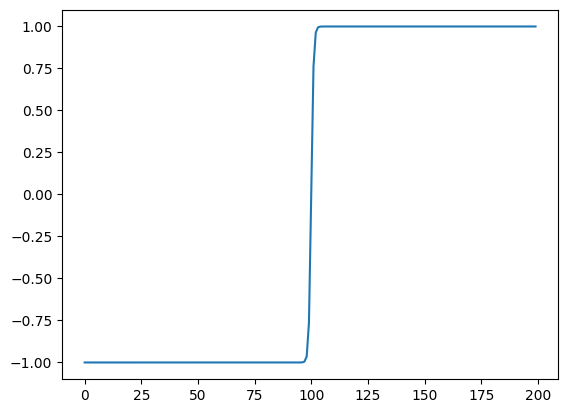

In [ ]:
from math import exp

def myTanh(x):
  return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

ip = [x for x in range(-100, 100)]
op = [myTanh(x) for x in ip]
plt.plot(op)
plt.show()

### ReLU

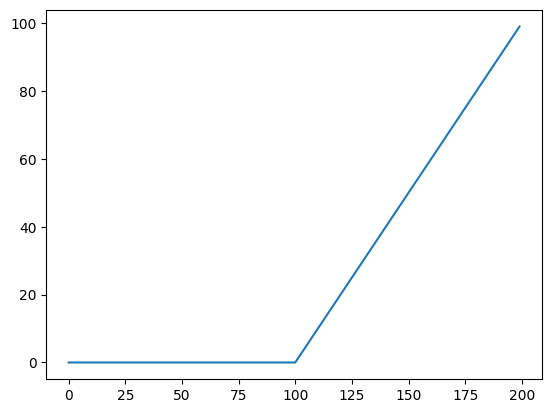

In [ ]:
def relu(x):
  return max(0, x)

ip = [x for x in range(-100, 100)]
op = [relu(x) for x in ip]
plt.plot(op)
plt.show()

### Leaky ReLU

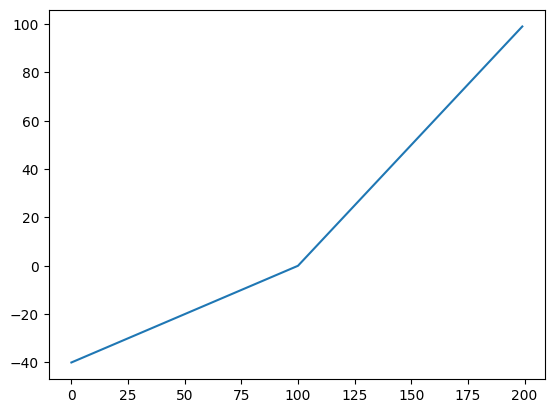

In [ ]:
def leaky_relu(x):
  z = 0.4
  if (x > 0):
    return x
  else:
    return z * x

ip = [x for x in range(-100, 100)]
op = [leaky_relu(x) for x in ip]
plt.plot(op)
plt.show()

### Softplus

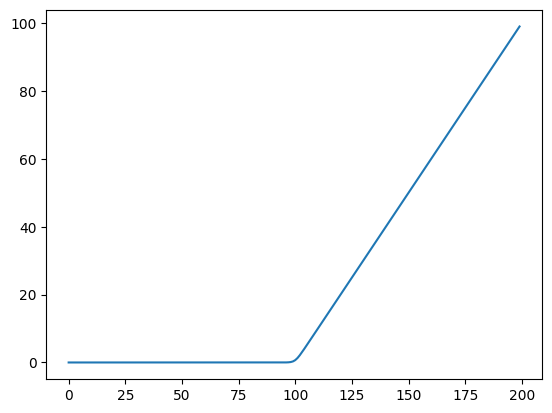

In [ ]:
from math import log

def softplus(x):
  return log(1 + exp(x))

ip = [x for x in range(-100, 100)]
op = [softplus(x) for x in ip]
plt.plot(op)
plt.show()

### Exponential Linear Unit (*ELU*)

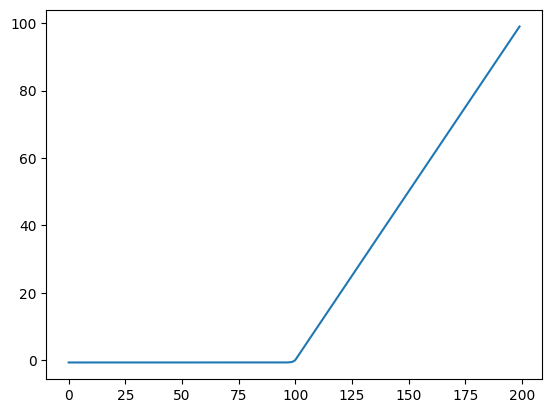

In [ ]:
def elu(x):
  alpha = 0.7
  if (x > 0):
    return x
  else:
    return alpha * (exp(x) - 1)

ip = [x for x in range(-100, 100)]
op = [elu(x) for x in ip]
plt.plot(op)
plt.show()

# Tensores con PyTorch | 1 de marzo

In [ ]:
import torch
import math

### Creando tensores

In [ ]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[8.2591e+24, 4.5815e-41, 8.2591e+24, 4.5815e-41],
        [1.6297e-16, 4.5815e-41, 4.1475e+24, 4.5815e-41],
        [1.6294e-16, 4.5815e-41, 4.1475e+24, 4.5815e-41]])


In [ ]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


### Random tensor and seeding

In [ ]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


### Tamaños del tensor

In [ ]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[1.0930e-06, 3.1448e-41, 8.2590e+24],
         [4.5815e-41, 8.9683e-44, 0.0000e+00]],

        [[1.1210e-43, 0.0000e+00, 3.0099e+09],
         [3.1455e-41, 1.0842e-19, 1.7735e+00]]])
torch.Size([2, 2, 3])
tensor([[[2.8988e+09, 3.1455e-41, 8.5411e-10],
         [3.1448e-41, 0.0000e+00, 1.1755e-38]],

        [[8.5411e-10, 3.1448e-41, 2.0000e+00],
         [0.0000e+00, 8.0671e+17, 1.7561e+22]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


In [ ]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integer = torch.tensor((2, 6, 7, 8, 4, 9, 3, 15, 17, 9))
print(some_integer)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  6,  7,  8,  4,  9,  3, 15, 17,  9])
tensor([[2, 4, 6],
        [3, 6, 9]])


### Tipos de datos en tensores

In [ ]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
tensor([[ 0,  1,  5],
        [11, 11, 11]], dtype=torch.int32)


### Matemática y lógica en PyTorch Tensor

In [ ]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [ ]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


### Tensor Broadcasting

In [ ]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.6146, 0.5999, 0.5013, 0.9397],
        [0.8656, 0.5207, 0.6865, 0.3614]])
tensor([[1.2291, 1.1998, 1.0026, 1.8793],
        [1.7312, 1.0413, 1.3730, 0.7228]])


Two tensors are “broadcastable” if the following rules hold:

* Each tensor has at least one dimension.

* When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [ ]:
a = torch.ones(4, 3, 2)
b = a * torch.rand(3, 2) # dimensión 2 y 3 iguales, la 1 ausente
print(b)

c = a * torch.rand(3, 1) # dimensión 2 igual, tercera diferente
print(c)

d = a * torch.rand(1, 2) # dimensión 3 igual, segunda diferente
print(d)

tensor([[[0.0381, 0.2138],
         [0.5395, 0.3686],
         [0.4007, 0.7220]],

        [[0.0381, 0.2138],
         [0.5395, 0.3686],
         [0.4007, 0.7220]],

        [[0.0381, 0.2138],
         [0.5395, 0.3686],
         [0.4007, 0.7220]],

        [[0.0381, 0.2138],
         [0.5395, 0.3686],
         [0.4007, 0.7220]]])
tensor([[[0.8217, 0.8217],
         [0.2612, 0.2612],
         [0.7375, 0.7375]],

        [[0.8217, 0.8217],
         [0.2612, 0.2612],
         [0.7375, 0.7375]],

        [[0.8217, 0.8217],
         [0.2612, 0.2612],
         [0.7375, 0.7375]],

        [[0.8217, 0.8217],
         [0.2612, 0.2612],
         [0.7375, 0.7375]]])
tensor([[[0.8328, 0.8444],
         [0.8328, 0.8444],
         [0.8328, 0.8444]],

        [[0.8328, 0.8444],
         [0.8328, 0.8444],
         [0.8328, 0.8444]],

        [[0.8328, 0.8444],
         [0.8328, 0.8444],
         [0.8328, 0.8444]],

        [[0.8328, 0.8444],
         [0.8328, 0.8444],
         [0.8328, 0.8444]]])


### Operaciones

In [ ]:
a = torch.rand(2, 4) * 2 - 1
print("common")
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(angles)
print("\nSeno y arcoseno")
print(angles)
print(sines)
print(inverses)

print("\nBitwise XOR")
b = torch.tensor([1, 5, 11])
c= torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

print("\nBroadcasted, comparación de igualdad por elemento")
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)
print(torch.eq(d, e))

print("\nReducción")
print(torch.max(d))
print(torch.max(d).item())
print(torch.mean(d))
print(torch.std(d))
print(torch.prod(d))
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2])))

# vector y alli
v1 = torch.tensor([1., 0., 0.])
v2 = torch.tensor([0., 1., 0.])
m1 = torch.rand(2, 2)
m2 = torch.tensor([[3., 0.], [0., 3.]])

print("\nVectores y matrices")
print(torch.cross(v2, v1))
print(m1)
m3 = torch.matmul(m1, m2) # Soporta broadcasting
print(m3)
print(torch.svd(m3)) # Singular Value Decomposition

common
tensor([[0.6054, 0.3429, 0.1310, 0.9869],
        [0.5530, 0.2932, 0.4032, 0.3653]])
tensor([[-0., -0., 1., -0.],
        [1., -0., 1., 1.]])
tensor([[-1., -1.,  0., -1.],
        [ 0., -1.,  0.,  0.]])
tensor([[-0.5000, -0.3429,  0.1310, -0.5000],
        [ 0.5000, -0.2932,  0.4032,  0.3653]])

Seno y arcoseno
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.9033,    nan,    nan])

Bitwise XOR
tensor([3, 2, 1])

Broadcasted, comparación de igualdad por elemento
tensor([[ True, False],
        [False, False]])

Reducción
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectores y matrices
tensor([ 0.,  0., -1.])
tensor([[0.9413, 0.4460],
        [0.9289, 0.6293]])
tensor([[2.8240, 1.3380],
        [2.7866, 1.8878]])
torch.return_types.svd(
U=tensor([[-0.6801, -0.7331],
        [-0.7331,  0.6801]]),
S=tensor([4.5795, 0.3500]),
V=tensor([[-0.8655, -0.5009],
        [-0.5009,  0.8655]]))


### Alterando tensores

In [ ]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print("a:")
print(a)
print(torch.sin(a)) # nuevo tensor
print(a) # a sin cambios

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print("\nb:")
print(b)
print(torch.sin_(b)) # el barra baja hace cambio
print(b) # Se modifica b con el resultado anterior

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [ ]:
if torch.cuda.is_available():
  print("Tenemos GPU")
else:
  print("No tienes :c")

No tienes :c


### Funciones de activación

In [ ]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
x = torch.linspace(-5, 5, 200) #tensor de (200, 1)
x = Variable(x)
x_np = x.data.numpy()

In [ ]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

In [ ]:
%matplotlib inline

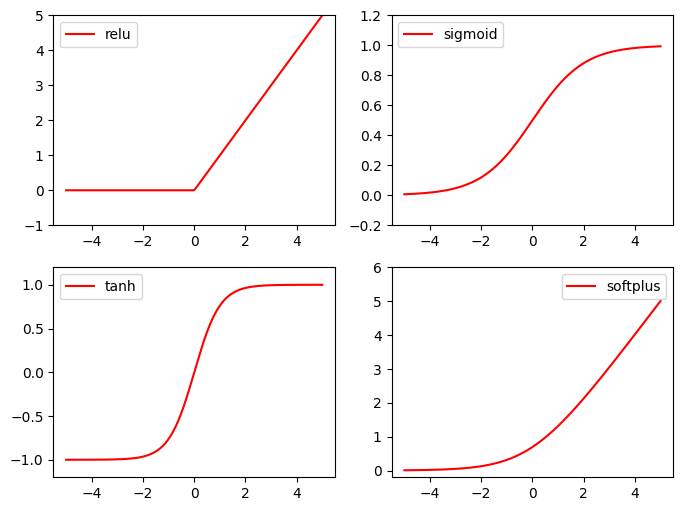

In [ ]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### Regresión

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

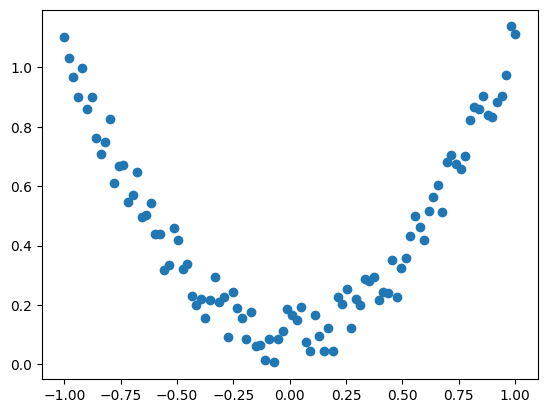

In [ ]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size()) # simular ruido, tamaño 100 x 1

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x)) # activación con ReLU
    x = self.predict(x)
    return x

In [ ]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

In [ ]:
plt.ion()

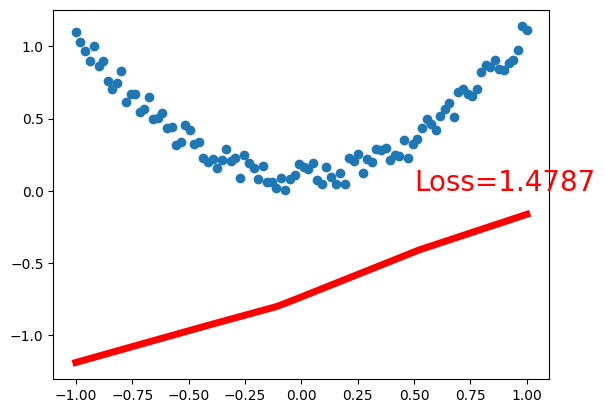

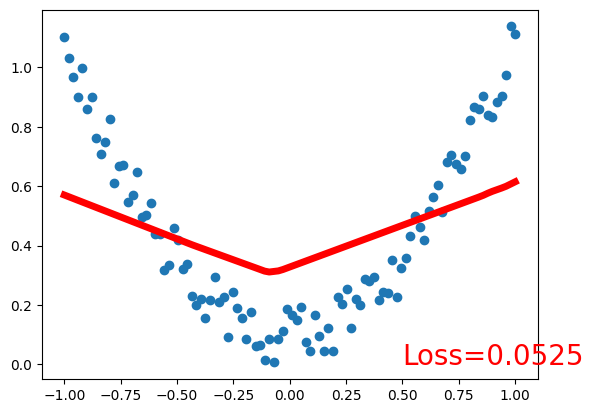

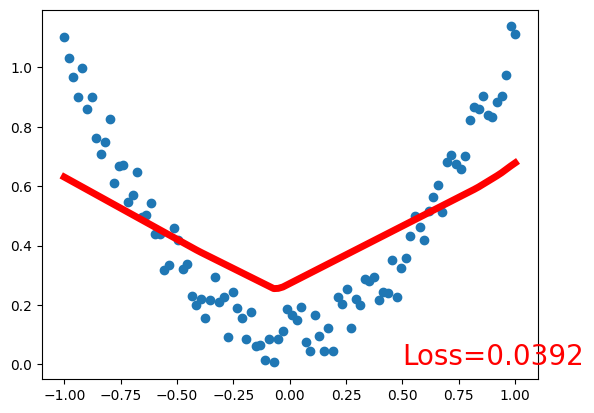

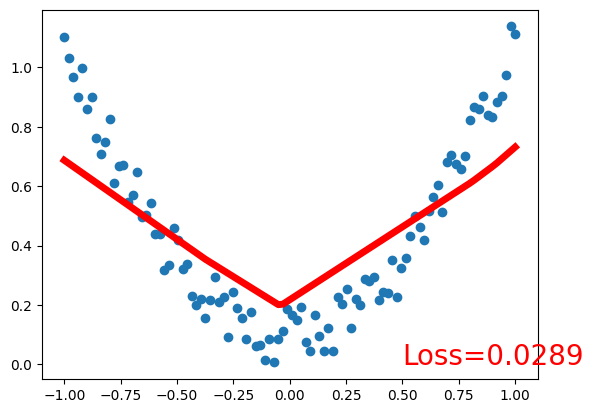

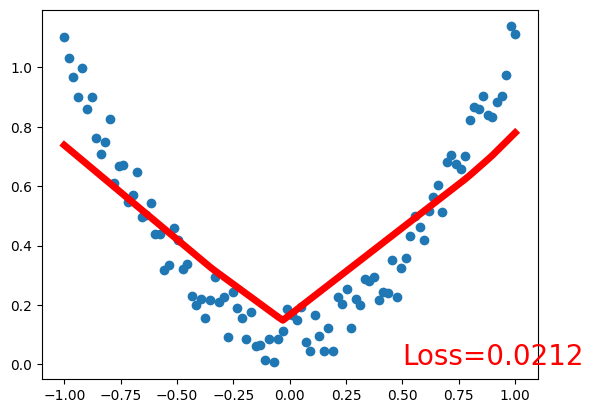

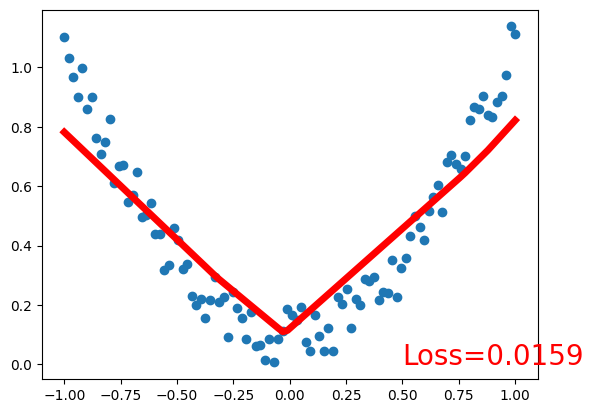

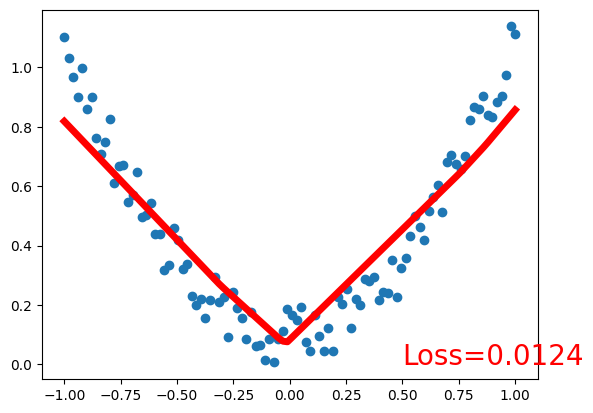

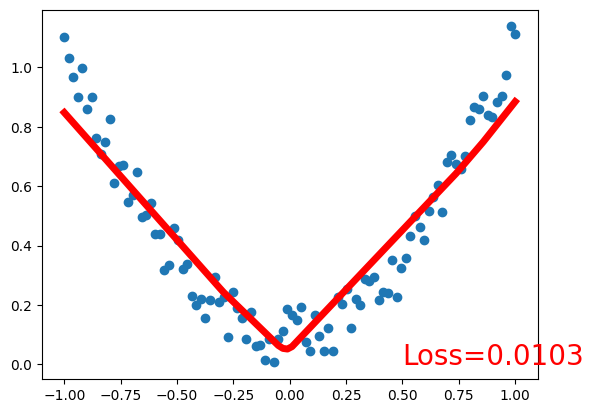

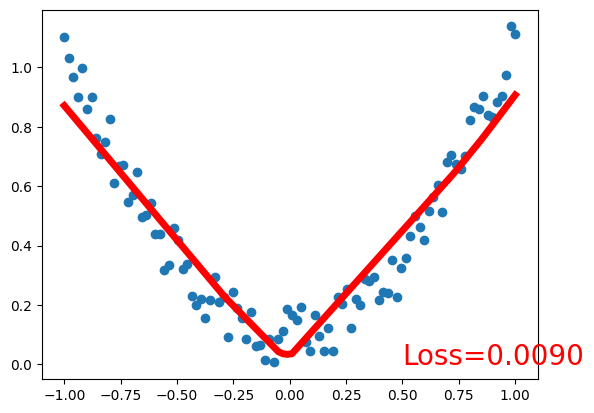

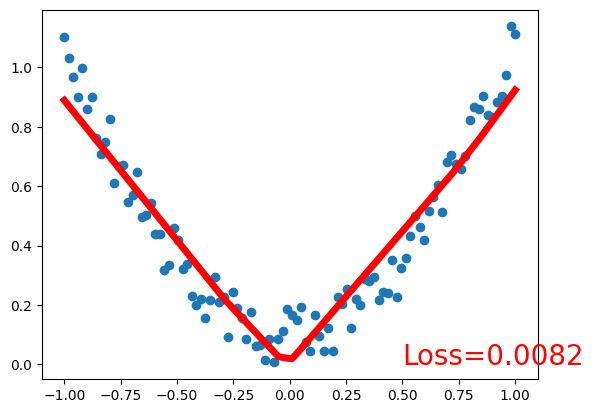

In [ ]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

## Clasificación

### Cómo generar datasets con ski-learn

#### Moon classification

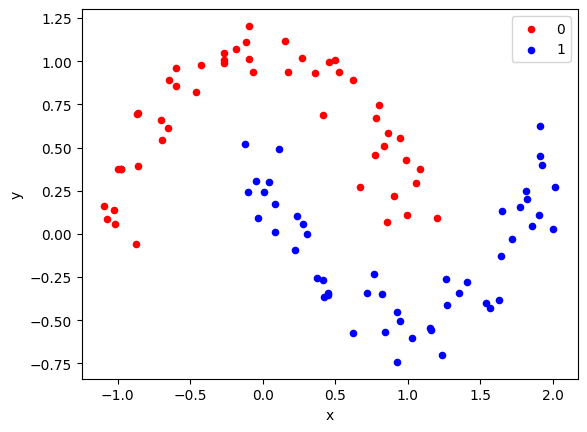

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

#### Circles classification

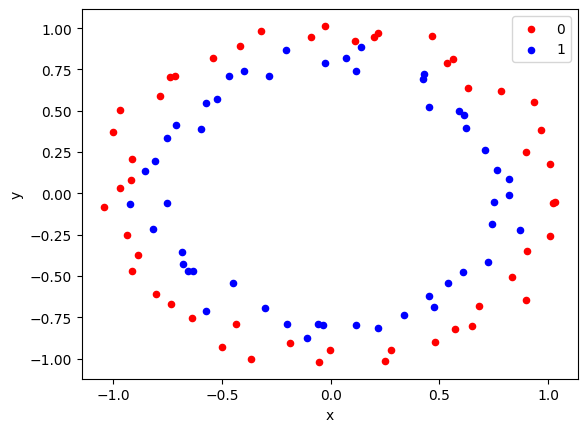

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

#### Test de regresión

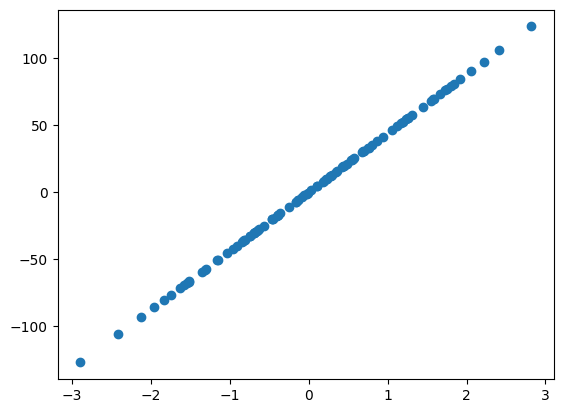

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

#### Ejemplo con PyTorch

In [ ]:
import torch
from torch.autograd import Variable


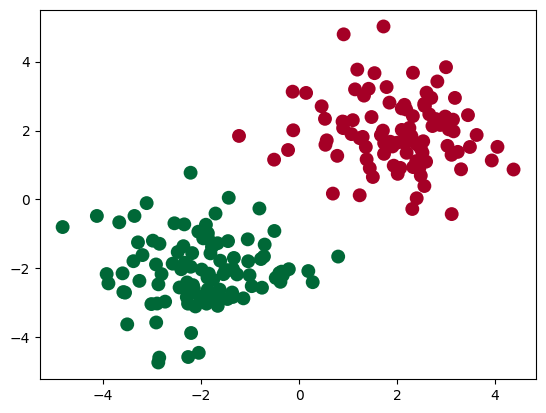

In [ ]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x)) # activación con ReLU
    x = self.predict(x)
    return x

In [ ]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


<ipython-input-53-b6d7eb050889>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


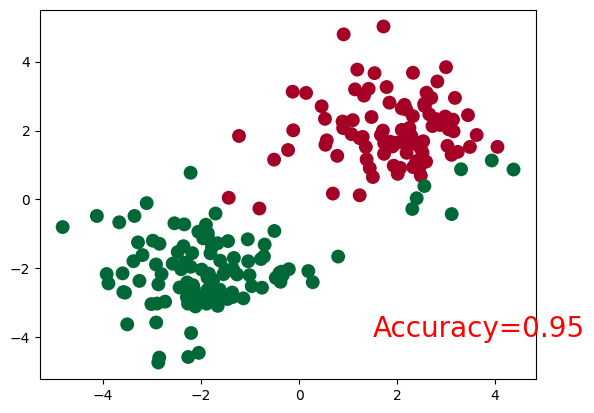

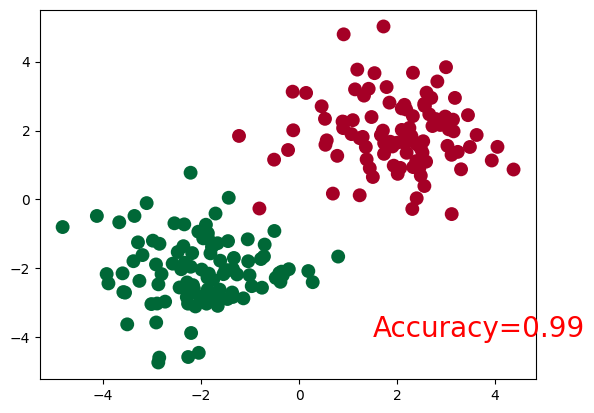

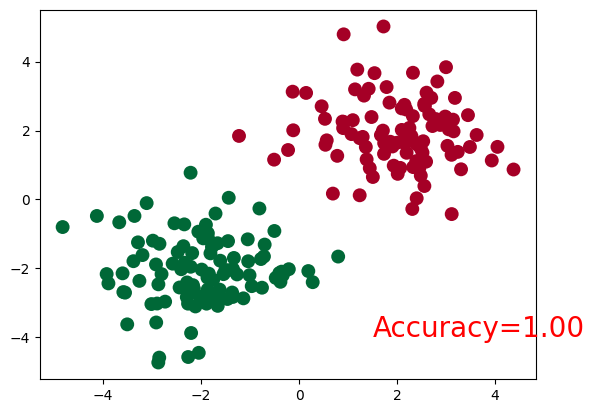

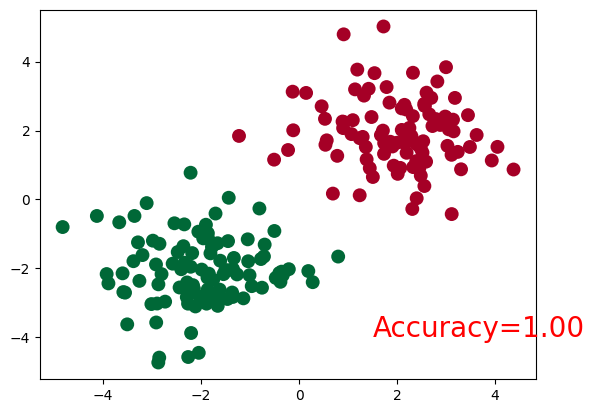

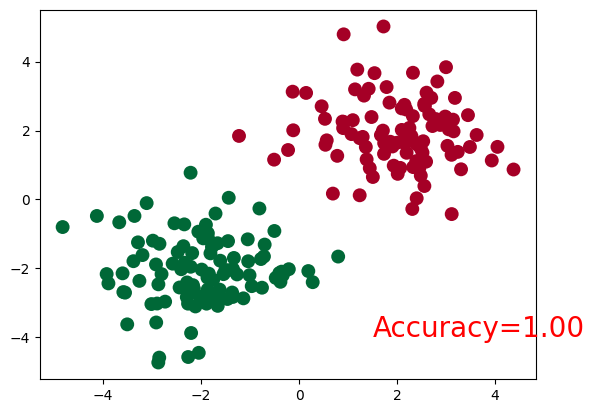

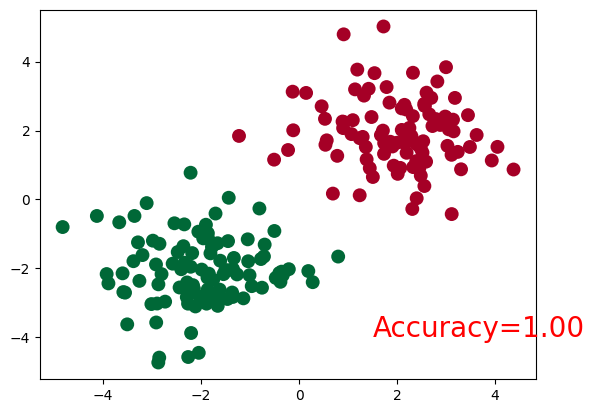

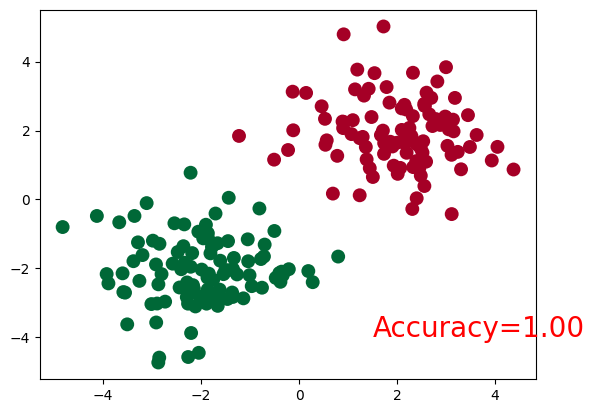

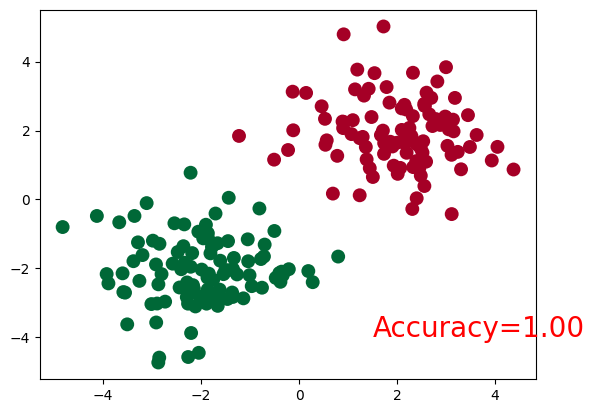

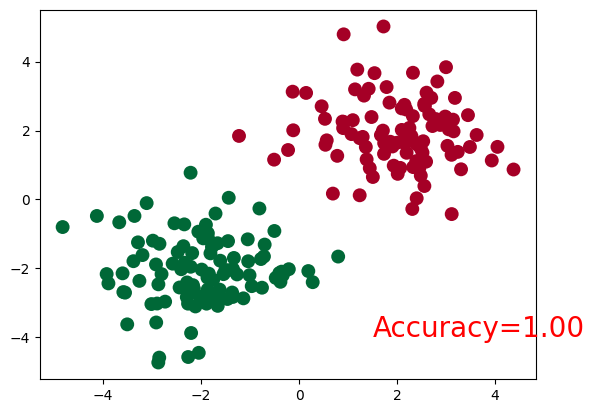

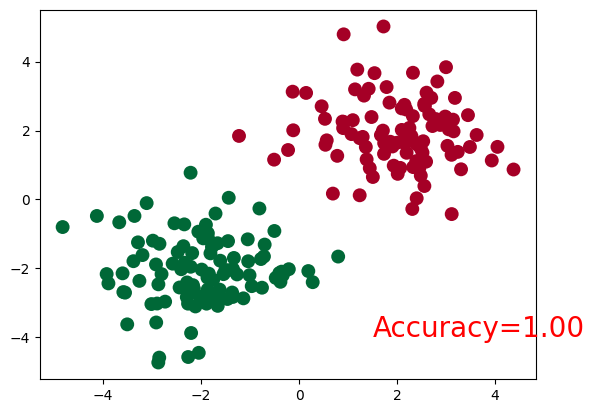

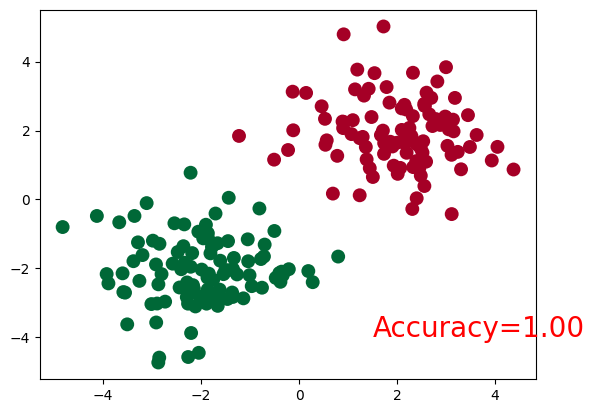

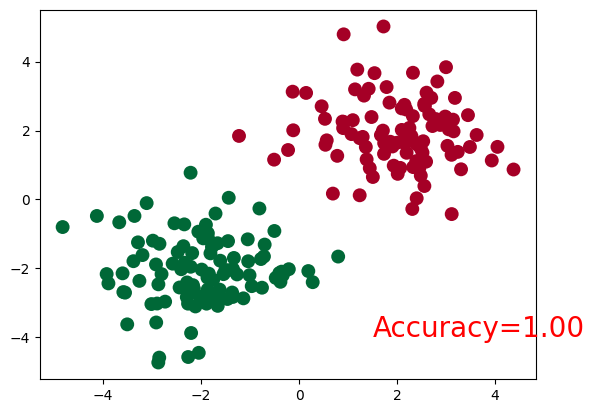

In [ ]:
## Prueba en 100 iteraciones
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0 or t in [3, 6]: # Graficar cada 10 iteraciones
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

#### ANN

In [ ]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

In [ ]:
# Datos del profe para el ejemplo
!gdown 1nPBjCjDISb4Rzp2TX_2U4c2V7VcoiGsm
!gdown 1e9KfWAqyRhlu0-jXRzt4E6dVvzrcELms

Downloading...
From: https://drive.google.com/uc?id=1nPBjCjDISb4Rzp2TX_2U4c2V7VcoiGsm
To: /content/test.csv
100% 4.77k/4.77k [00:00<00:00, 12.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e9KfWAqyRhlu0-jXRzt4E6dVvzrcELms
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 97.5MB/s]


In [ ]:
# Prepare Dataset
# load data
train = pd.read_csv("train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values # [1. 0. 1. ... 7. 6. 9.]
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


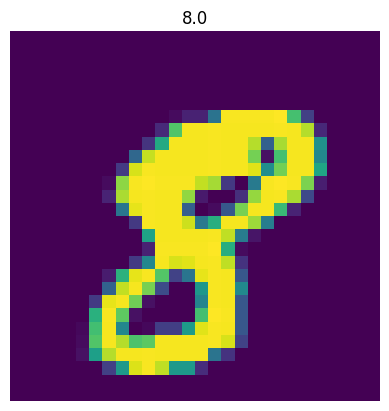

In [ ]:
# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7596923112869263  Accuracy: 79.46428680419922 %
Iteration: 1000  Loss: 0.4641415774822235  Accuracy: 87.47618865966797 %
Iteration: 1500  Loss: 0.2202872782945633  Accuracy: 89.47618865966797 %
Iteration: 2000  Loss: 0.30000826716423035  Accuracy: 90.54762268066406 %
Iteration: 2500  Loss: 0.3194900155067444  Accuracy: 91.69047546386719 %
Iteration: 3000  Loss: 0.12202706187963486  Accuracy: 92.44047546386719 %
Iteration: 3500  Loss: 0.26587504148483276  Accuracy: 93.13095092773438 %
Iteration: 4000  Loss: 0.0676424503326416  Accuracy: 93.83333587646484 %
Iteration: 4500  Loss: 0.3201414942741394  Accuracy: 94.17857360839844 %
Iteration: 5000  Loss: 0.10581585019826889  Accuracy: 94.60713958740234 %
Iteration: 5500  Loss: 0.17951460182666779  Accuracy: 94.80952453613281 %
Iteration: 6000  Loss: 0.19244271516799927  Accuracy: 95.1547622680664 %
Iteration: 6500  Loss: 0.09413915872573853  Accuracy: 95.29762268066406 %
Iteration: 7000  Loss: 0.12506094574928284  Ac

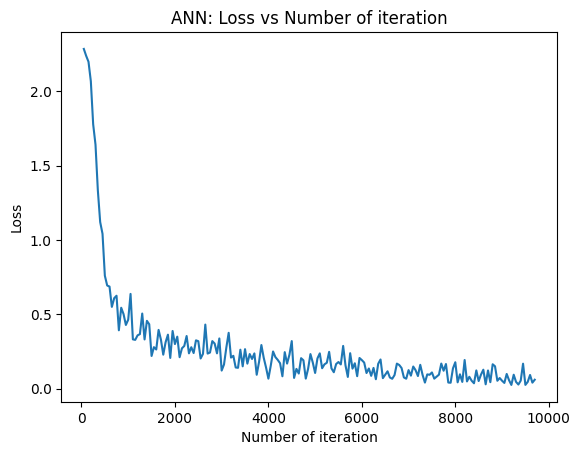

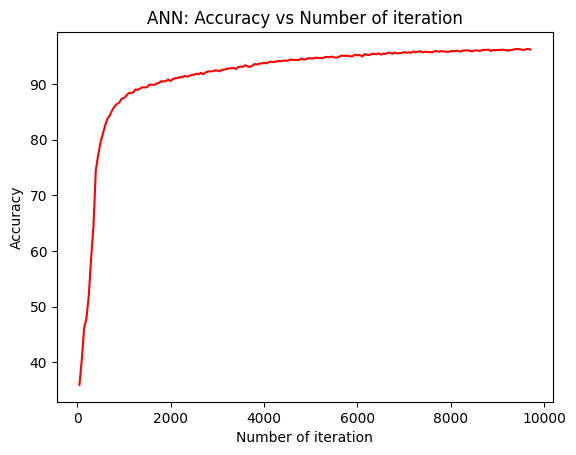

In [ ]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

#15 de marzo

### Expresiones regulares

In [ ]:
import re

pattern = r"\d{4}-\d{4}-\d{4}-\d{4}"
text = "Prueba 4561- hola 1234-5678-9123-4567"

sub = re.sub(pattern, "****-****-****-****", text)
text = re.findall(pattern, text)
print(sub)
print(text)

Prueba 4561- hola ****-****-****-****
['1234-5678-9123-4567']


### Ordinal Encoder

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

data = asarray([['red'], ['green'], ['blue']])
print(data)

encoder = OrdinalEncoder()

result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


### Dummy variable

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

data = asarray([['red'], ['green'], ['blue']])
print(data)

encoder = OneHotEncoder(drop='first', sparse_output=False)

onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 1.]
 [1. 0.]
 [0. 0.]]


### One Hot Encoding

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

data = asarray([['red'], ['green'], ['blue']])
print(data)

encoder = OneHotEncoder(sparse_output=False)

onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Gensim

In [ ]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'Word2Vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

model = Word2Vec(sentences, min_count=1)
print(model)

# words = list(model.wv.vocab)
# print(words)

# print(model['sentence'])
model.save('model.bin')

new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
Word2Vec<vocab=14, vector_size=100, alpha=0.025>


### Ejemplo robots in warehouse

In [ ]:
import numpy as np

enviroment_rows = 11
enviroment_columns = 11

q_values = np.zeros((enviroment_rows, enviroment_columns, 4))

# definir acciones como posiciones del arreglo
actions = ['up', 'right', 'down', 'left']

In [ ]:
# Recompensas en general, incluyendo estantes para que no tome esa opción
rewards = np.full((enviroment_rows, enviroment_columns), -100.)

# ubicacions de aisles
aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

# Asignar recompensa en los pasillos o donde si puede pasar
for row_index in range(1, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.

for row in rewards:
  print(row)

[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


In [ ]:
# Funciones de apoyo
def is_terminal_state(current_row_index, current_column_index):
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

def get_starting_location():
  current_row_index = np.random.randint(enviroment_rows)
  current_column_index = np.random.randint(enviroment_columns)

  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(enviroment_rows)
    current_column_index = np.random.randint(enviroment_columns)

  return current_row_index, current_column_index

# Epsilon greedy alg
def get_next_action(current_row_index, current_column_index, epsilon):
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else:
    return np.random.randint(4)

In [ ]:
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index

  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < enviroment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < enviroment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1

  return new_row_index, new_column_index

def get_shortest_path(start_row_index, start_column_index):
  # Retorno inmediato si inicia en una posición inválida
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else:
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([start_row_index, start_column_index])

    while not is_terminal_state(current_row_index, current_column_index):
      # Obtener el mejor movimiento
      action_index = get_next_action(current_row_index, current_column_index, 1.)

      # moverse a la siguiente posición y añadirla a la lista de movimientos
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])

    return shortest_path

In [ ]:
epsilon = 0.9 # Porcentaje de tiempo en que debemos tomar la mejor decisión
discount_factor = 0.9 # Descuento para futuras recompensas
learning_rate = 0.9

for episode in range(1000):
  row_index, column_index = get_starting_location()

  while not is_terminal_state(row_index, column_index):
    action_index = get_next_action(row_index, column_index, epsilon)

    old_row_index, old_column_index = row_index, column_index
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('training complete')

training complete


In [ ]:
print(get_shortest_path(3, 9))
print(get_shortest_path(5, 0))
print(get_shortest_path(9, 5))

In [ ]:
path = get_shortest_path(5, 2)
path.reverse()
print(path)